In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.stats import zscore
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

In [12]:
file_path = r"C:\Users\SAAD COMMUNICATION\OneDrive\Desktop\forecasting_case_study.csv"
df = pd.read_csv(file_path)

In [13]:
df.head()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
0,SKU1,02/05/2017,27750,0%,0,0,0,0.0,0,0,0,0
1,SKU1,02/12/2017,29023,0%,1,0,1,0.0,0,1,0,0
2,SKU1,2/19/2017,45630,17%,0,0,0,0.0,0,0,0,0
3,SKU1,2/26/2017,26789,0%,1,0,1,0.0,0,0,0,0
4,SKU1,03/05/2017,41999,17%,0,0,0,0.0,0,0,0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product             1218 non-null   object 
 1   date                1218 non-null   object 
 2   Sales               1218 non-null   int64  
 3   Price Discount (%)  1218 non-null   object 
 4   In-Store Promo      1218 non-null   int64  
 5   Catalogue Promo     1218 non-null   int64  
 6   Store End Promo     1218 non-null   int64  
 7   Google_Mobility     1218 non-null   float64
 8   Covid_Flag          1218 non-null   int64  
 9   V_DAY               1218 non-null   int64  
 10  EASTER              1218 non-null   int64  
 11  CHRISTMAS           1218 non-null   int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 114.3+ KB


In [16]:
# Convert Date Column to Standard Format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

Handling Missing Values

In [17]:
# Mean Imputation
df['Sales'].fillna(df['Sales'].mean(), inplace=True)

In [22]:
df[['Sales']].head()

,Sales
0,27750
1,29023
2,45630
3,26789
4,41999


In [19]:
# Remove '%' and convert column to numeric
df['Price Discount (%)'] = df['Price Discount (%)'].str.rstrip('%').astype(float)

In [20]:
# KNN Imputation
imputer = KNNImputer(n_neighbors=5)
df[['Price Discount (%)']] = imputer.fit_transform(df[['Price Discount (%)']])

In [23]:
df[['Price Discount (%)']].head()

,Price Discount (%)
0,0.0
1,0.0
2,17.0
3,0.0
4,17.0


Handling Outliers

In [24]:
# Z-Score Method
z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))
df = df[(z_scores < 3).all(axis=1)]

In [25]:
# Inter-Quartile Method
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)]

NLP Data Cleaning & Featurization

In [26]:
# Remove special characters, convert to lowercase
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

df['Product'] = df['Product'].apply(clean_text)

In [27]:
# Categorical Text to Numerical Representations
encoder = LabelEncoder()
df['Product'] = encoder.fit_transform(df['Product'])

Save Cleaned Data

In [28]:
cleaned_file = r"C:\Users\SAAD COMMUNICATION\OneDrive\Desktop\forecasting_case_study.csv"
df.to_csv(cleaned_file, index=False)
print(f"Cleaned data saved at: {cleaned_file}")

Cleaned data saved at: C:\Users\SAAD COMMUNICATION\OneDrive\Desktop\forecasting_case_study.csv


In [29]:
df.head()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
0,0,2017-02-05,27750,0.0,0,0,0,0.0,0,0,0,0
2,0,2017-02-19,45630,17.0,0,0,0,0.0,0,0,0,0
3,0,2017-02-26,26789,0.0,1,0,1,0.0,0,0,0,0
4,0,2017-03-05,41999,17.0,0,0,0,0.0,0,0,0,0
5,0,2017-03-12,29731,0.0,0,0,0,0.0,0,0,0,0


In [30]:
print(df.isnull().sum())

Product               0
date                  0
Sales                 0
Price Discount (%)    0
In-Store Promo        0
Catalogue Promo       0
Store End Promo       0
Google_Mobility       0
Covid_Flag            0
V_DAY                 0
EASTER                0
CHRISTMAS             0
dtype: int64


In [31]:
print(df.nunique())

Product                  6
date                   187
Sales                 1017
Price Discount (%)      69
In-Store Promo           2
Catalogue Promo          2
Store End Promo          2
Google_Mobility         40
Covid_Flag               2
V_DAY                    1
EASTER                   1
CHRISTMAS                1
dtype: int64


In [32]:
print(df.describe())

           Product                           date         Sales  \
count  1055.000000                           1055   1055.000000   
mean      2.481517  2019-01-07 12:27:58.862558976  24313.398104   
min       0.000000            2017-02-05 00:00:00      0.000000   
25%       1.000000            2018-01-17 12:00:00   7057.500000   
50%       3.000000            2019-01-06 00:00:00  18827.000000   
75%       4.000000            2019-12-18 12:00:00  34780.500000   
max       5.000000            2020-12-27 00:00:00  85108.000000   
std       1.681293                            NaN  20705.784200   

       Price Discount (%)  In-Store Promo  Catalogue Promo  Store End Promo  \
count         1055.000000     1055.000000      1055.000000      1055.000000   
mean            23.784834        0.454976         0.218957         0.336493   
min              0.000000        0.000000         0.000000         0.000000   
25%              2.000000        0.000000         0.000000         0.000000   
5

In [49]:
sns.set_theme(style="whitegrid", palette="pastel")

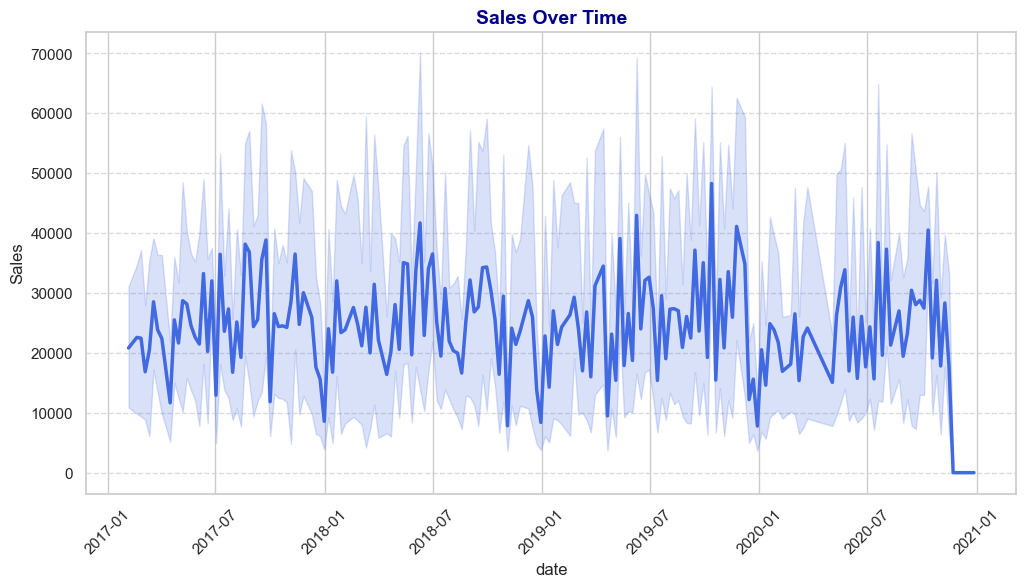

In [50]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='Sales', data=df, color="royalblue", linewidth=2.5)
plt.title("Sales Over Time", fontsize=14, fontweight="bold", color="darkblue")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

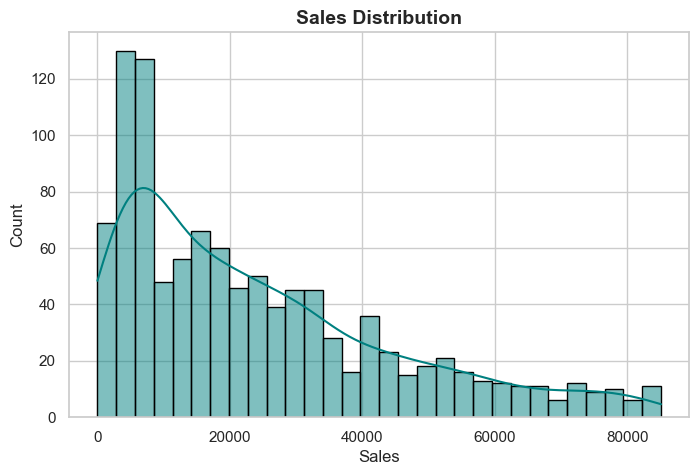

In [51]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Sales'], bins=30, kde=True, color="teal", edgecolor="black")
plt.title("Sales Distribution", fontsize=14, fontweight="bold")
plt.show()

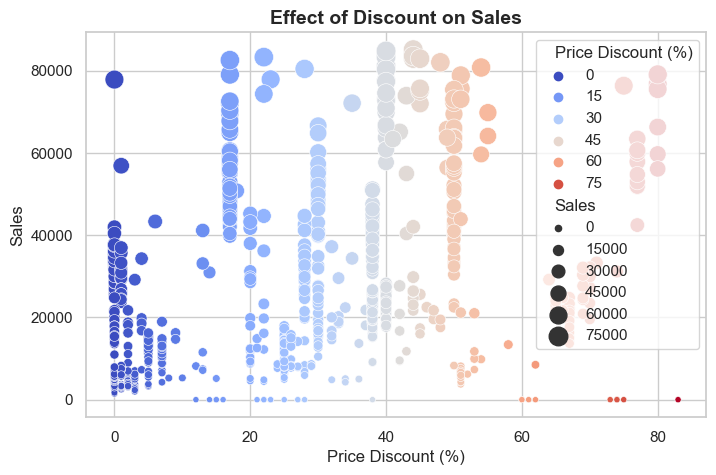

In [54]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Price Discount (%)', y='Sales', data=df, hue='Price Discount (%)', palette="coolwarm", size="Sales", sizes=(20, 200))
plt.title("Effect of Discount on Sales", fontsize=14, fontweight="bold")
plt.show()

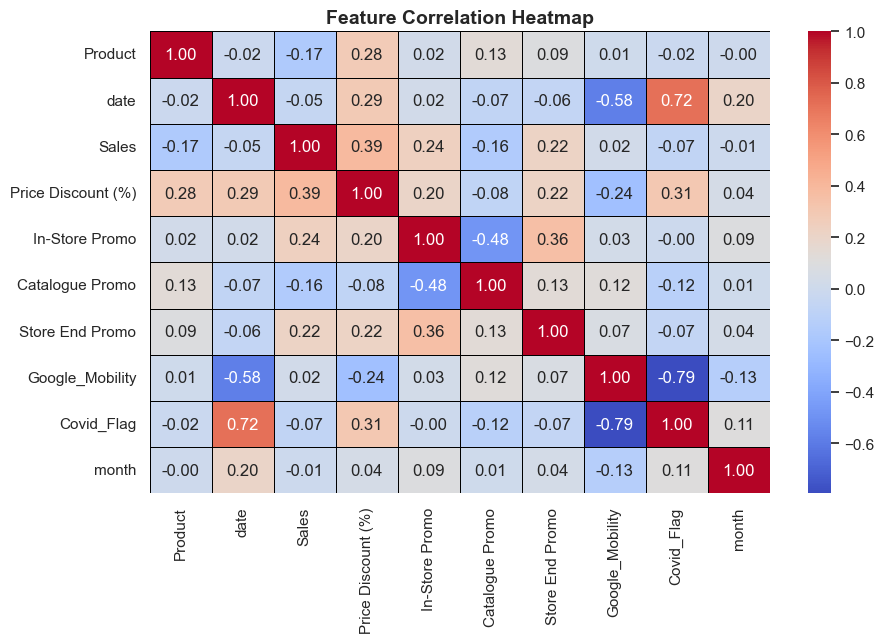

In [55]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, linecolor='black')
plt.title("Feature Correlation Heatmap", fontsize=14, fontweight="bold")
plt.show()

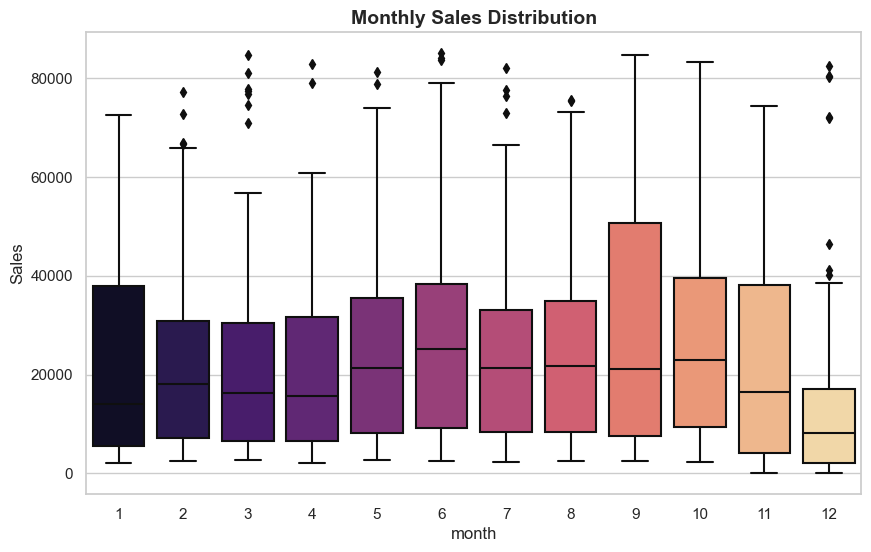

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='Sales', data=df, palette="magma")
plt.title("Monthly Sales Distribution", fontsize=14, fontweight="bold")
plt.show()

In [43]:
print(df[['V_DAY', 'EASTER', 'CHRISTMAS']].sum())

V_DAY        0
EASTER       0
CHRISTMAS    0
dtype: int64


In [47]:
df.drop(columns=['V_DAY', 'EASTER', 'CHRISTMAS'], inplace=True)

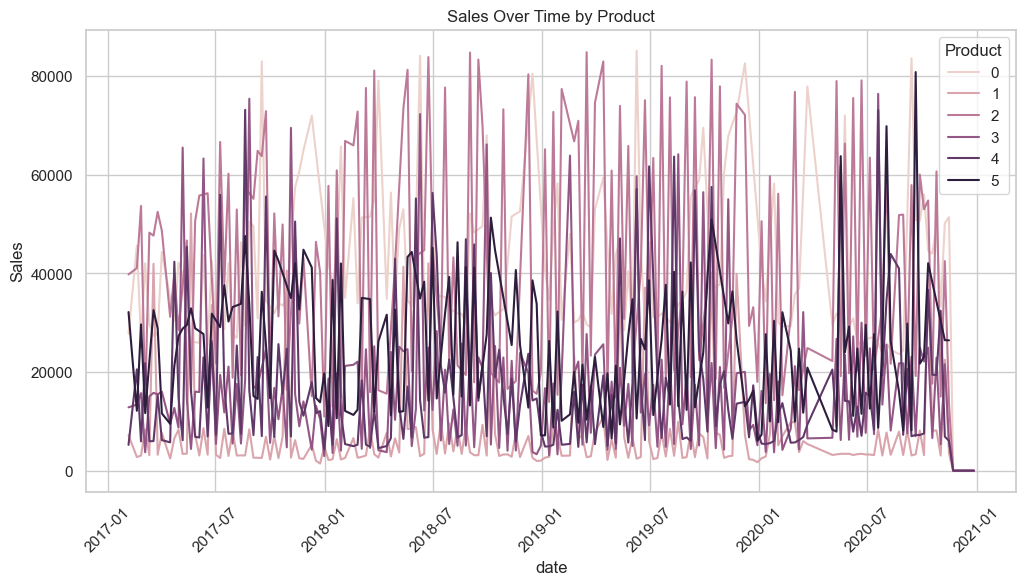

In [57]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='Sales', hue='Product', data=df)
plt.title("Sales Over Time by Product")
plt.xticks(rotation=45)
plt.show()

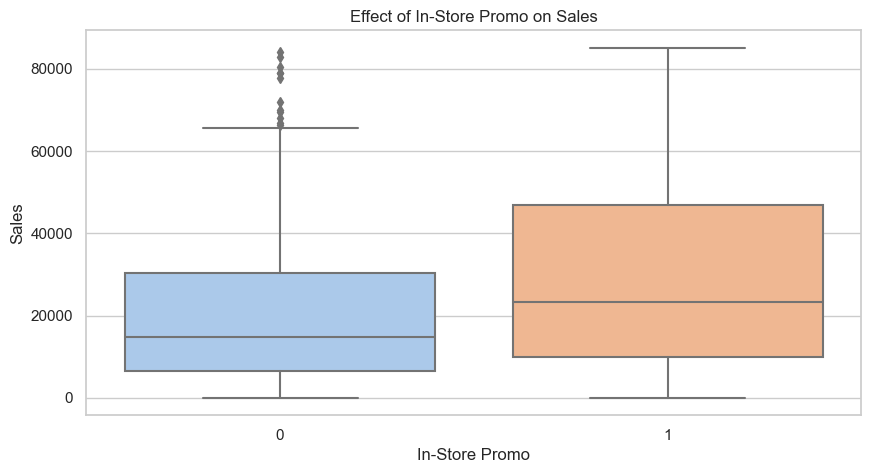

In [58]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='In-Store Promo', y='Sales', data=df)
plt.title("Effect of In-Store Promo on Sales")
plt.show()

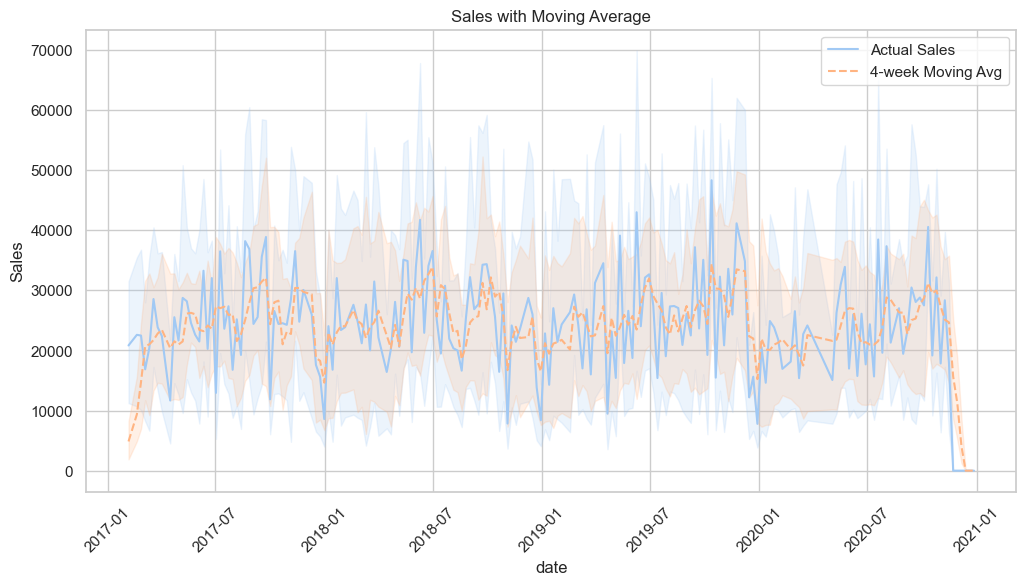

In [59]:
df['Sales_MA'] = df['Sales'].rolling(window=4).mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='Sales', data=df, label="Actual Sales")
sns.lineplot(x='date', y='Sales_MA', data=df, label="4-week Moving Avg", linestyle="dashed")
plt.title("Sales with Moving Average")
plt.xticks(rotation=45)
plt.legend()
plt.show()

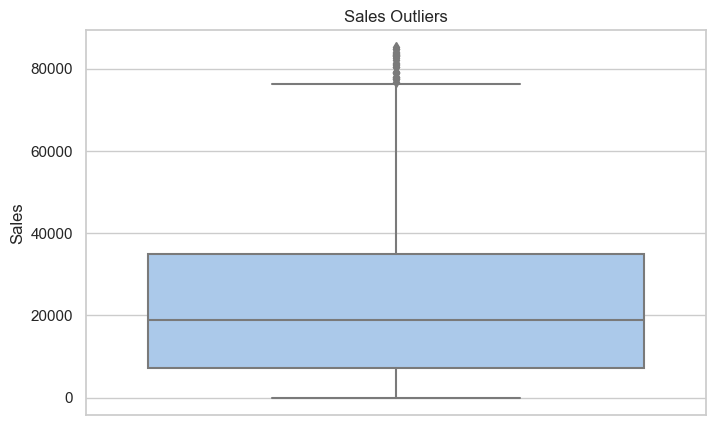

In [60]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Sales'])
plt.title("Sales Outliers")
plt.show()